<a href="https://colab.research.google.com/github/trnq-eu/learnpytorch/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Wed Jul  5 03:40:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"

print(f"Device used: {device}")

2.0.1+cu118
Device used: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
industries = ["fasion","automotive", "medicine"]
for industry in industries:
  print(industry)

fasion
automotive
medicine


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
result = "done"

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torchvision import datasets, transforms

# Definisce la trasformazione da applicare ai dati: transorma in tensori e normalizza con media e deviazione standard
transform = transforms.Compose([transforms.ToTensor(), # converte le immagini in tensori
    transforms.Normalize((0.1307,), (0.3081,)) # normalizza i valori dei pixel
    ]
)

# Scarica i carica il dataset di training
training_set = datasets.MNIST(root="data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(training_set, batch_size=32, shuffle=True,)

# Scarica i carica il dataset di test
test_set = datasets.MNIST(root="data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False,)

100%|██████████| 9912422/9912422 [00:00<00:00, 198195705.05it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 56764617.54it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 78054822.03it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 16551284.77it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

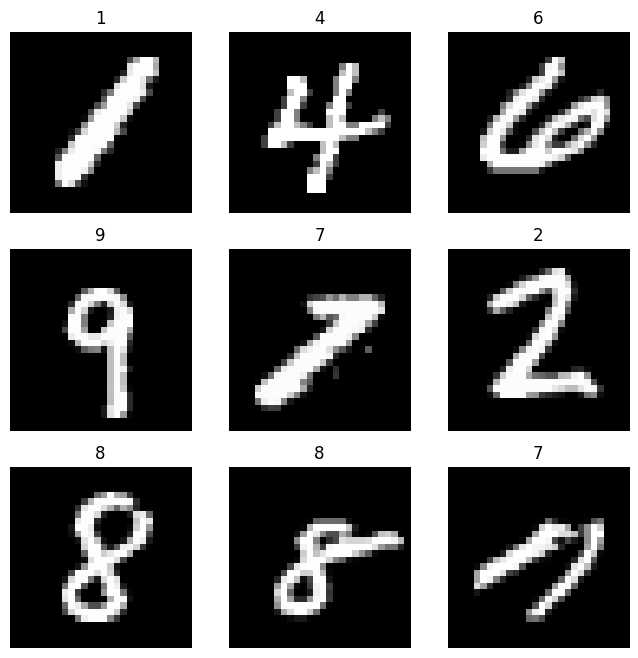

In [ ]:
import matplotlib.pyplot as plt

# Estrae un batch di immagini di esempio dal dataloader di addestramento
images, labels = next(iter(train_loader))

#   Visualizza le immagini
fig, axes = plt.subplots(3,3,figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(images[i].squeeze(), cmap="gray")
  ax.axis("off")
  ax.set_title(labels[i].item())

plt.show()



In [ ]:
image, label = training_set[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
class_names = training_set.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
result = "già fatto"

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
import torch.nn as nn

class MNISTModelTinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x=self.block_1(x)
    # print(x.shape)
    x=self.block_2(x)
    # print(x.shape)
    x=self.classifier(x)
    return(x)

torch.manual_seed(42)
model_MNIST = MNISTModelTinyVGG(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)
model_MNIST

MNISTModelTinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)

    # 2. calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc = accuracy_fn(y_true = y,
                            y_pred = y_pred.argmax(dim=1))

    # 3. optimizer zero gra
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              ):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model(X)
      # 2. Loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%n")

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.0 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn


# setting optimizer, loss function and accuracy fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_MNIST.parameters(), lr=0.1)


# Training and testing the model

torch.manual_seed(42)
from timeit import default_timer as timer
model_time_start = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_MNIST,
             data_loader=train_loader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device=device
             )
  test_step(data_loader = test_loader,
            model=model_MNIST,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn            )

model_time_end = timer()
total_train_time = (model_time_end - model_time_start)
print(f"Total training time: {total_train_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.18068 | Train accuracy: 0.05%
Test loss: 0.05647 | Test accuracy: 98.13%n
Epoch: 1
------------
Train loss: 0.06648 | Train accuracy: 0.05%
Test loss: 0.04661 | Test accuracy: 98.54%n
Epoch: 2
------------
Train loss: 0.05431 | Train accuracy: 0.05%
Test loss: 0.04864 | Test accuracy: 98.34%n
Epoch: 3
------------
Train loss: 0.04616 | Train accuracy: 0.05%
Test loss: 0.04012 | Test accuracy: 98.70%n
Epoch: 4
------------
Train loss: 0.04094 | Train accuracy: 0.05%
Test loss: 0.04550 | Test accuracy: 98.65%n
Total training time: 114.15998415199999


In [ ]:
device="cpu"
print(device)

cpu


In [ ]:
# Training and testing the model on cpu
# Training and testing the model

torch.manual_seed(42)
from timeit import default_timer as timer
model_time_start = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_MNIST,
             data_loader=train_loader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device=device
             )
  test_step(data_loader = test_loader,
            model=model_MNIST,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn            )

model_time_end = timer()
total_train_time = (model_time_end - model_time_start)
print(f"Total training time: {total_train_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.03721 | Train accuracy: 0.05%
Test loss: 0.03459 | Test accuracy: 98.89%n
Epoch: 1
------------
Train loss: 0.03289 | Train accuracy: 0.05%
Test loss: 0.03785 | Test accuracy: 98.73%n
Epoch: 2
------------
Train loss: 0.03153 | Train accuracy: 0.05%
Test loss: 0.04180 | Test accuracy: 98.60%n
Epoch: 3
------------
Train loss: 0.02969 | Train accuracy: 0.05%
Test loss: 0.03374 | Test accuracy: 98.93%n
Epoch: 4
------------
Train loss: 0.02810 | Train accuracy: 0.05%
Test loss: 0.04109 | Test accuracy: 98.73%n
Total training time: 269.77505141300026


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the predicition to the target label.

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # aggiunge una dimensione e manda le immagini al device
      # sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass, produce logits
      pred_logit = model_MNIST(sample)

      # ottieni le probabilità di predizione, da logit a probabilità
      pred_prob = torch.softmax(pred_logit.squeeze(dim=0))

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
# crea campioni di immagini casuali

import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_set), k=9):
    test_samples.append(sample)
    test_labels.append(label)


# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[4].shape}\nTest sample label: {test_labels[4]} ({class_names[test_labels[4]]})")


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (6 - six)


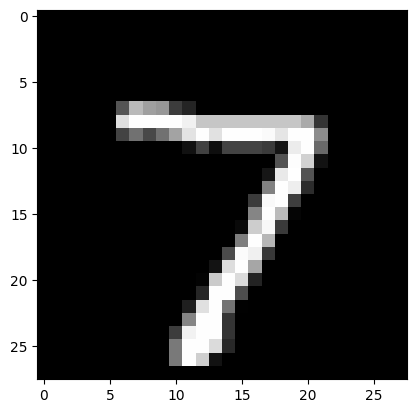

In [ ]:
plt.imshow(test_set[0][0].squeeze(), cmap="gray")


In [ ]:
model_pred_logits = model_MNIST(test_set[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

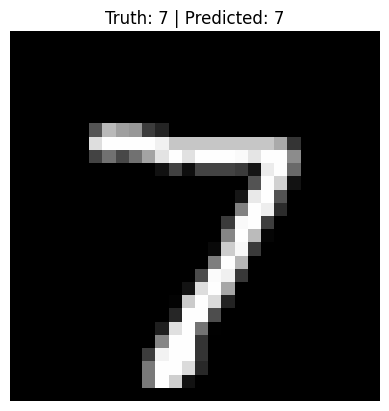

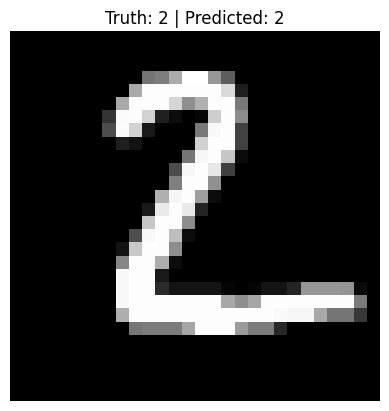

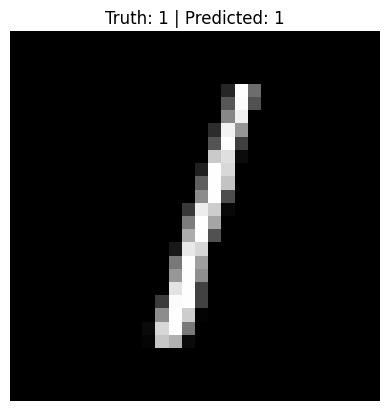

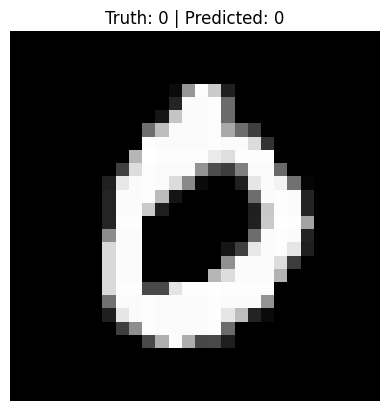

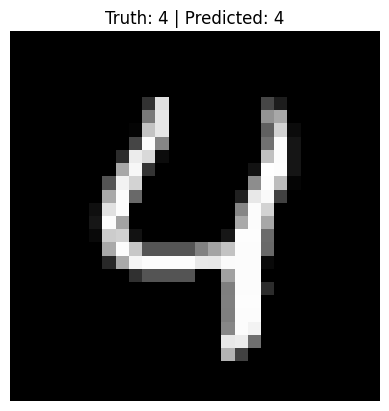

In [ ]:
num_to_plot = 5
for i in range(num_to_plot):
  img = test_set[i][0]
  label = test_set[i][1]

  # Make prediction on image
  model_pred_logits = model_MNIST(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Predicted: {model_pred_label.cpu().item()}")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [ ]:

# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


In [ ]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_MNIST.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_loader)):
    X, y = X.to(device), y.to(device)
    # Forward pass
    pred_logits = model_MNIST(X)
    # Probabilities
    pred_probs = torch.softmax(pred_logits, dim=1)
    # Labels
    pred_labels = torch.argmax(pred_probs, dim=1)
    # Append the labels to the preds list
    y_preds.append(pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [ ]:
test_set.targets[:10], y_preds[:10]


(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

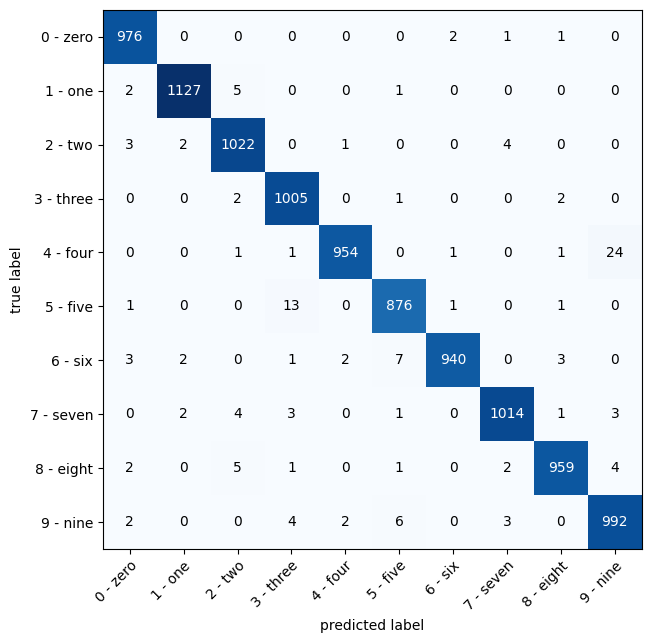

In [ ]:
# plot confusion matrix


from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_set.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.randn((1,3,64,64))
random_tensor[:1]

tensor([[[[ 0.9597, -0.6528,  1.5164,  ...,  0.4485,  0.5702,  0.1343],
          [-0.0725, -1.6620,  1.3095,  ...,  0.1474,  0.5609,  1.3157],
          [-1.5665,  0.7689,  0.2483,  ..., -1.1101,  0.0595, -0.3809],
          ...,
          [-0.7935,  0.8911,  0.6404,  ..., -1.1609,  0.0528, -0.1800],
          [-1.4128, -0.3936, -0.1354,  ...,  1.4583, -2.2945,  2.0888],
          [ 0.0758,  0.6374, -0.4562,  ..., -0.7194, -0.2667,  1.0912]],

         [[-0.8055, -0.9665, -0.6833,  ...,  0.0314, -0.2141,  0.0390],
          [ 0.4784,  1.2129,  0.9358,  ..., -0.0560,  0.1312,  2.2458],
          [ 0.4370, -1.6624, -0.2017,  ..., -0.7707, -0.6689, -1.3492],
          ...,
          [ 0.6545,  0.6703, -0.8040,  ..., -0.2381, -1.5379,  0.7178],
          [-0.8741, -0.2064,  1.0386,  ...,  0.7359,  0.9056, -0.1125],
          [ 0.7597, -1.0946, -0.4518,  ..., -0.3790,  0.8875, -0.7812]],

         [[ 0.9580, -1.0590,  0.6044,  ...,  0.2409,  1.2124,  0.4328],
          [-0.8971, -1.5140,  

In [ ]:
import torch.nn as nn
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(2,2),
                       stride=2,
                       padding=0)

conv_layer_2 = nn.Conv2d(in_channels=10,
                       out_channels=3,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

conv_tensor = conv_layer(random_tensor)
conv_tensor

# relu_tensor = nn.ReLU()(conv_tensor)
# conv_tensor_2 = conv_layer_2(relu_tensor)

# max_pool_layer = nn.MaxPool2d(kernel_size=2)


# max_pool_tensor = max_pool_layer(conv_tensor_2)

tensor([[[[ 0.1042,  0.7253, -0.1600,  ..., -0.6478,  0.2875,  0.3232],
          [-0.2529,  0.0743,  0.0778,  ..., -0.5794, -0.4828, -0.3422],
          [ 0.2849,  0.2992, -0.6165,  ...,  0.1356, -0.8240,  0.4339],
          ...,
          [ 0.4253, -0.0600, -0.0341,  ...,  0.1925,  0.0446,  0.3911],
          [ 0.2654,  0.3515,  1.2353,  ..., -0.8074, -0.4224, -0.0627],
          [ 0.0129, -0.2904,  0.1678,  ...,  0.4359,  0.4358,  0.4933]],

         [[ 0.2717,  0.5244,  0.9325,  ...,  0.9073, -0.2310, -0.1795],
          [ 0.6455, -0.0874, -0.1461,  ...,  1.2275, -0.0373, -0.1342],
          [-0.1937,  0.1067,  0.8022,  ...,  0.3140,  0.2285, -0.3023],
          ...,
          [ 0.0356,  0.6553,  0.0962,  ..., -0.7627, -0.3549,  0.6720],
          [-0.3683,  0.2148, -0.2466,  ..., -1.0892, -0.5829,  0.1797],
          [-0.0293,  0.1349, -0.2767,  ...,  0.1621,  0.0075, -0.5619]],

         [[-0.4696, -1.4155, -0.2160,  ..., -0.9885, -0.1299, -0.0796],
          [-0.6932, -0.7760,  

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# Import FashionMNIST dataset

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_dataset = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=ToTensor())

test_dataset = datasets.FashionMNIST(root="data",
                                     train=False,
                                     download=True,
                                     transform = ToTensor())

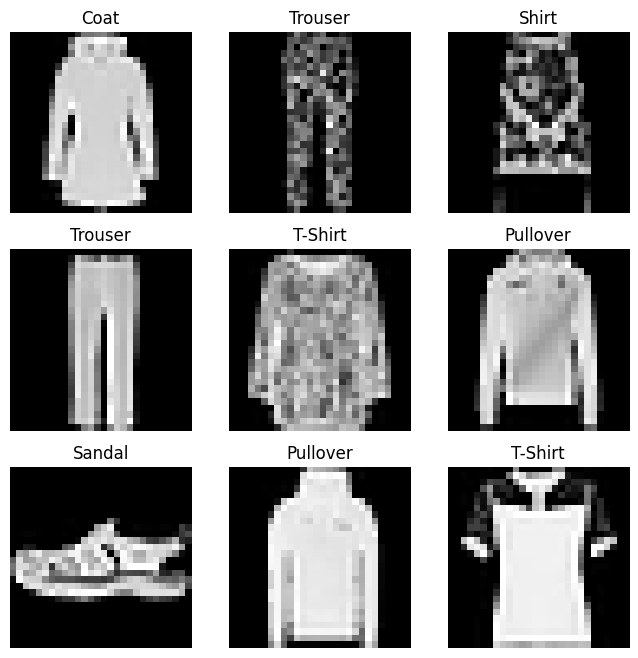

In [ ]:
# visualize the dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### DataLoaders
The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [ ]:
# create DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

### Model to train fashion MNIST

In [ ]:
class MNIST_model_0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                    stride=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
  )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

class_names = train_dataset.classes
model_0 = MNIST_model_0(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
print(model_0)


MNIST_model_0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


### Addestramento del modello Fashion MNIST


In [ ]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn


# setting optimizer, loss function and accuracy fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [ ]:
epochs=5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_0, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
  test_step(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.26093 | Train accuracy: 0.10%
Test loss: 0.30443 | Test accuracy: 89.13%n
Epoch: 1
------------
Train loss: 0.25504 | Train accuracy: 0.10%
Test loss: 0.30237 | Test accuracy: 88.68%n
Epoch: 2
------------
Train loss: 0.25034 | Train accuracy: 0.10%
Test loss: 0.29136 | Test accuracy: 89.43%n
Epoch: 3
------------
Train loss: 0.24569 | Train accuracy: 0.10%
Test loss: 0.28871 | Test accuracy: 89.88%n
Epoch: 4
------------
Train loss: 0.24010 | Train accuracy: 0.11%
Test loss: 0.28151 | Test accuracy: 90.16%n


### Predizioni Fashion MNIST

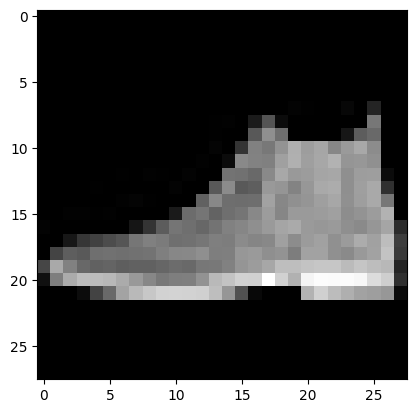

In [ ]:
plt.imshow(test_dataset[0][0].squeeze(), cmap="gray")


In [ ]:
model_pred_logits = model_0(test_dataset[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([9], device='cuda:0')

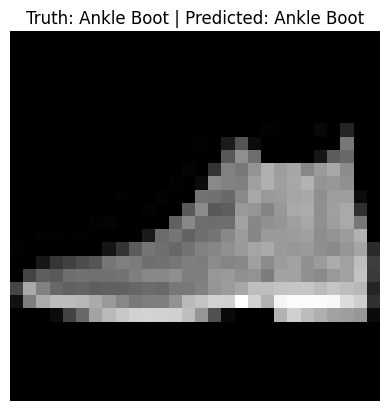

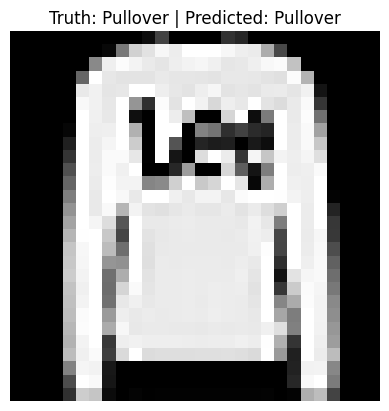

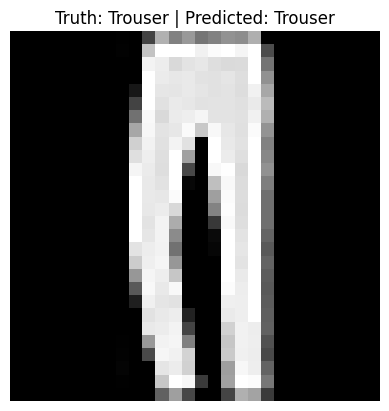

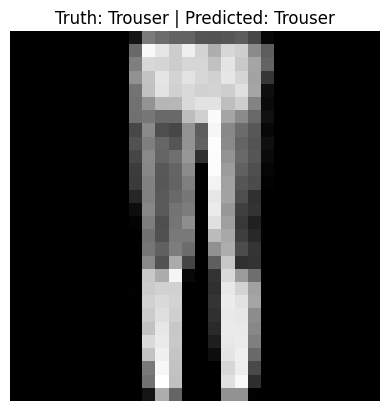

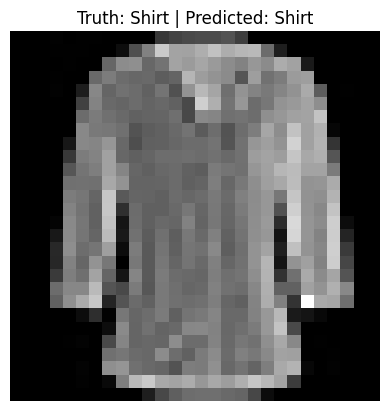

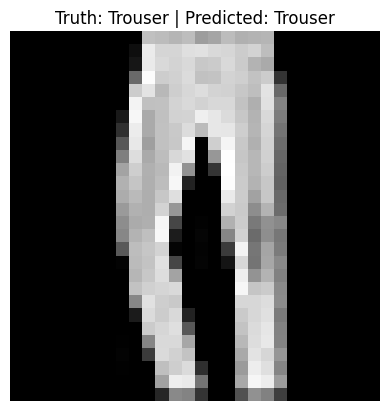

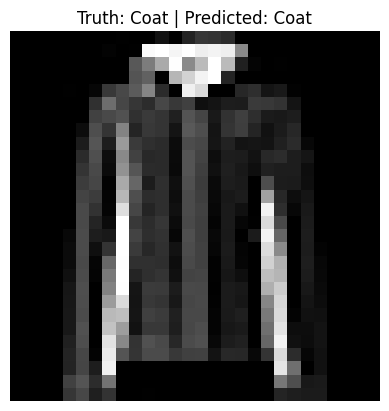

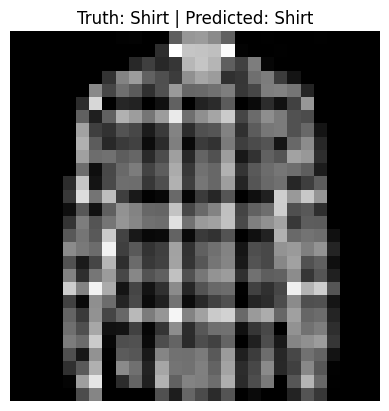

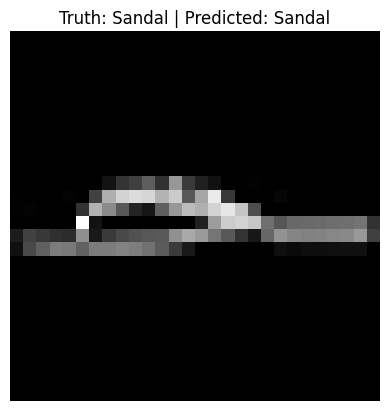

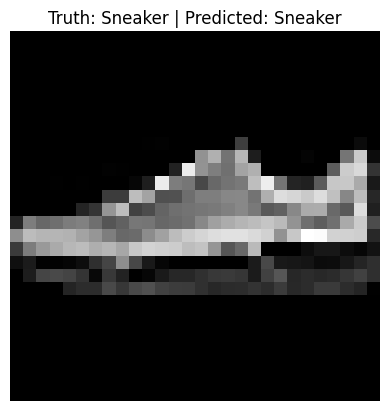

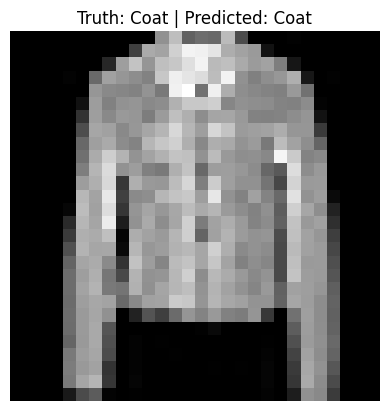

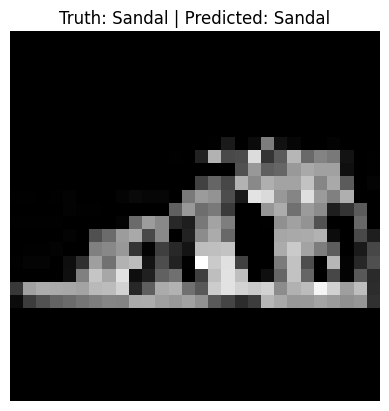

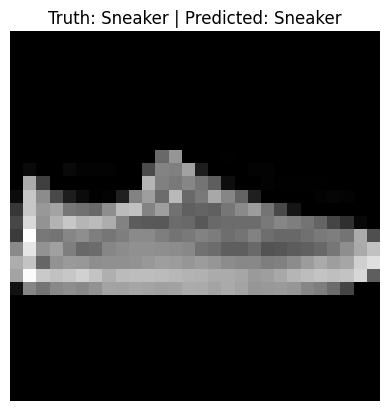

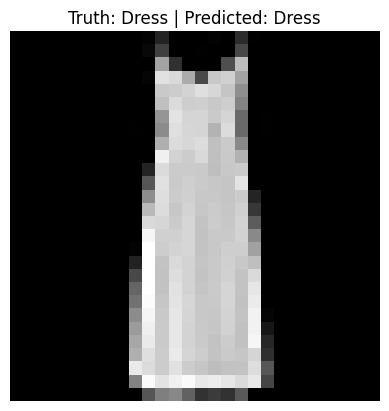

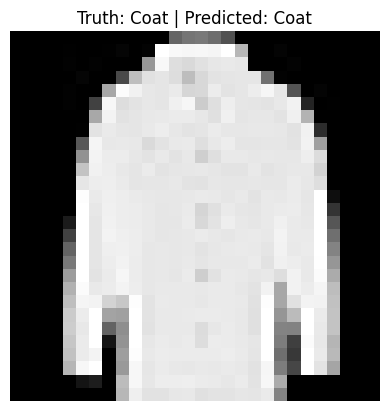

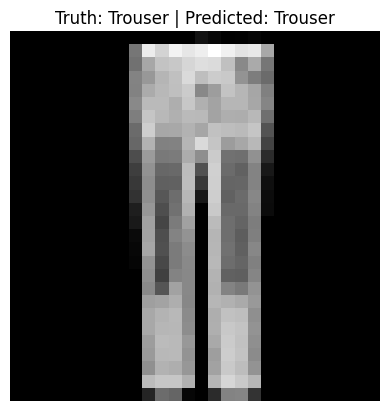

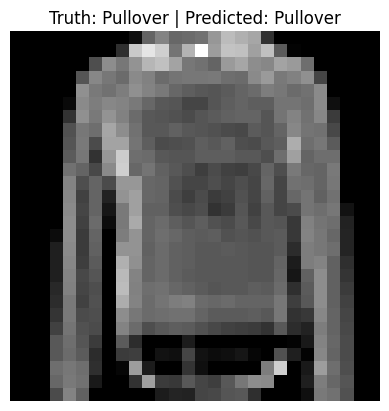

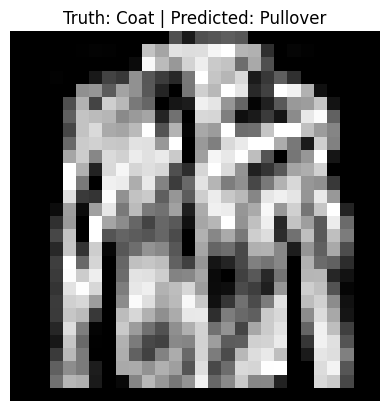

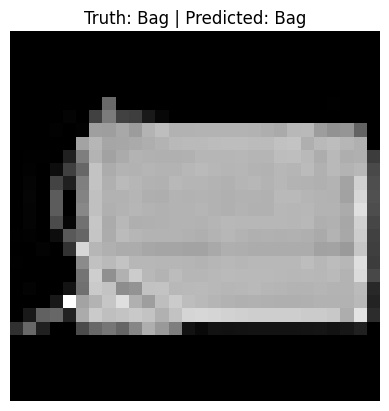

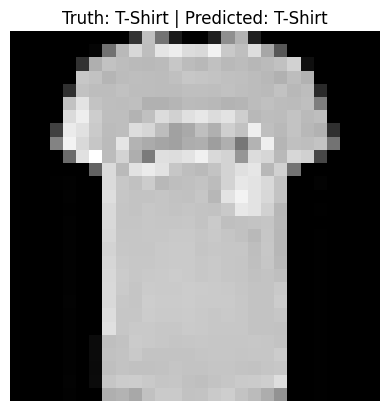

In [ ]:
num_to_plot = 20
for i in range(num_to_plot):
  img = test_dataset[i][0]
  label = test_dataset[i][1]

  # Make prediction on image
  model_pred_logits = model_0(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Get the class name from the labels map
  true_label_name = labels_map[label]
  predicted_label_name = labels_map[model_pred_label.cpu().item()]

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {true_label_name} | Predicted: {predicted_label_name}")
  plt.axis(False)

## Predizioni con model_0


In [ ]:

# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:00<00:00, 112144477.52it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 7509091.51it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 67086381.02it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22145925.12it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [ ]:

# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:

# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [ ]:
# Make predictions with trained model_0
test_preds = []
model_0.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_0(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [ ]:

# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

983

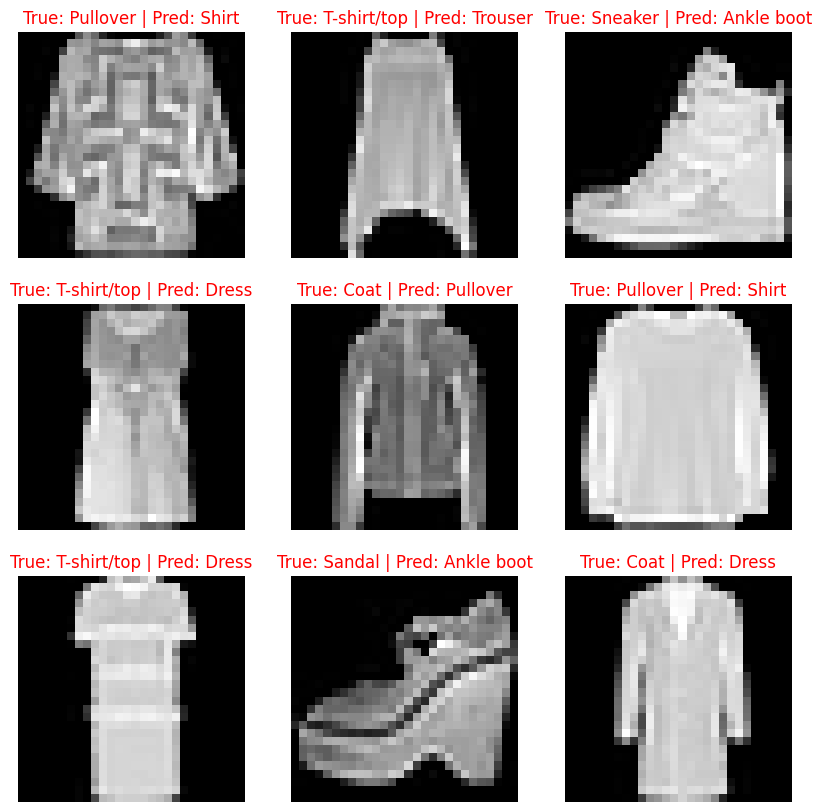

In [ ]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);

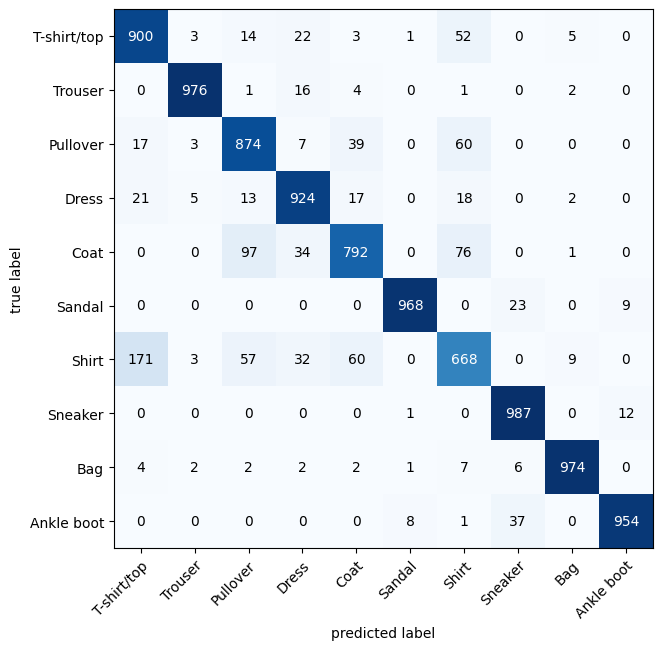

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(fashion_mnist_class_names))
confmat_tensor = confmat(preds=test_preds,
                         target=fashion_mnist_test.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)